In [16]:
#HealthCare

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#https://bit.ly/2WGzsWU

In [17]:
df = pd.read_csv('https://bit.ly/2WGzsWU')

In [18]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
MemberID                131 non-null int64
InpatientDays           131 non-null int64
ERVisits                131 non-null int64
OfficeVisits            131 non-null int64
Narcotics               131 non-null int64
DaysSinceLastERVisit    131 non-null float64
Pain                    131 non-null int64
TotalVisits             131 non-null int64
ProviderCount           131 non-null int64
MedicalClaims           131 non-null int64
ClaimLines              131 non-null int64
StartedOnCombination    131 non-null bool
AcuteDrugGapSmall       131 non-null int64
PoorCare                131 non-null int64
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.5 KB


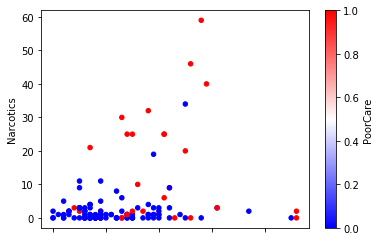

In [20]:
%matplotlib inline
df.plot.scatter('OfficeVisits', 'Narcotics', c='PoorCare', cmap='bwr')

In [23]:
value_counts = df.PoorCare.value_counts()
value_counts

0    98
1    33
Name: PoorCare, dtype: int64

In [26]:
value_counts[0] / (value_counts[1] + value_counts[0])

0.7480916030534351

In [30]:
value_counts[1] / (value_counts[1] + value_counts[0])

0.25190839694656486

In [41]:
from sklearn.model_selection import train_test_split

feat_list = list(df.columns)
feat_list.remove('PoorCare')
X = df[feat_list]
Y = df['PoorCare']

train_data, test_data, train_target, test_target = \
train_test_split(X, Y, train_size=0.75)

C:\Users\ricardo\Anaconda3\envs\AnalisePreeditiva\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:

from sklearn.linear_model import LogisticRegression
#metodo de newton para
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logreg.coef_

array([[ 2.56594010e-03,  2.07238153e-02, -9.93149605e-02,
         7.93514795e-02,  6.54716996e-02, -2.56554530e-03,
        -1.42380963e-02,  7.60334246e-04,  2.09141834e-02,
        -8.75714388e-03,  1.64969423e-03,  1.14323040e+00,
         1.47354565e-01]])

In [42]:
y_pred = logreg.predict(test_data)

In [43]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [44]:
test_target

102    1
19     0
108    0
100    1
125    0
59     1
106    1
127    0
32     0
15     0
92     0
101    0
85     0
86     0
120    0
112    0
55     1
9      0
119    0
26     0
41     0
91     0
46     1
104    1
67     0
114    0
51     0
68     0
33     0
40     1
10     0
43     0
87     0
Name: PoorCare, dtype: int64

In [45]:
logreg.predict_proba(test_data)

array([[0.65546353, 0.34453647],
       [0.79057673, 0.20942327],
       [0.92065164, 0.07934836],
       [0.85865448, 0.14134552],
       [0.89142003, 0.10857997],
       [0.58070142, 0.41929858],
       [0.20771076, 0.79228924],
       [0.89892499, 0.10107501],
       [0.96632054, 0.03367946],
       [0.96271493, 0.03728507],
       [0.90703023, 0.09296977],
       [0.82289612, 0.17710388],
       [0.95900771, 0.04099229],
       [0.92392511, 0.07607489],
       [0.91106545, 0.08893455],
       [0.77973467, 0.22026533],
       [0.10659316, 0.89340684],
       [0.87277576, 0.12722424],
       [0.91480427, 0.08519573],
       [0.94076483, 0.05923517],
       [0.95603712, 0.04396288],
       [0.93895362, 0.06104638],
       [0.42173061, 0.57826939],
       [0.15382732, 0.84617268],
       [0.94044298, 0.05955702],
       [0.83648744, 0.16351256],
       [0.84429681, 0.15570319],
       [0.83665238, 0.16334762],
       [0.88449627, 0.11550373],
       [0.81278474, 0.18721526],
       [0.